<a href="https://colab.research.google.com/github/sun-fox/Deep-Learning-CNN/blob/master/Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
 ! pip install kaggle

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [18]:
!ls ./gdrive/My\ Drive/Colab\ Notebooks/

 Dog_classification.ipynb		   'Untitled (1).ipynb'
 Handwriiten_digits_recognition_CNN.ipynb   Untitled1.ipynb
 Herbarnium.ipynb			    Untitled2.ipynb
 kaggle.json				    Untitled3.ipynb
 Multiclass_classification.ipynb	    Untitled4.ipynb
 Titanic_problem			    Untitled7.ipynb
 Traffic_Sign_Recognition.ipynb		    Untitled.ipynb
 Untitled0.ipynb			    YOLOv3_Tutorial.ipynb


In [0]:
!cp /content/gdrive/My\ Drive/Colab\ Notebooks/kaggle.json ~/.kaggle/kaggle.json

In [0]:
# !kaggle datasets list

In [0]:
# !kaggle datasets list -s dogs

In [20]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 98% 739M/750M [00:17<00:00, 33.7MB/s]
100% 750M/750M [00:17<00:00, 44.8MB/s]


In [21]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1357.jpg  
  inflating: images/Images/n02108089-boxer/n0210

In [25]:
!ls 

annotations  gdrive  images  sample_data  stanford-dogs-dataset.zip


In [0]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization

In [27]:
fpath = "./images/Images/"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02086910-papillon', 'n02089867-Walker_hound', 'n02096051-Airedale', 'n02113023-Pembroke', 'n02100583-vizsla', 'n02085936-Maltese_dog', 'n02099267-flat-coated_retriever', 'n02106662-German_shepherd', 'n02112350-keeshond', 'n02095314-wire-haired_fox_terrier', 'n02112137-chow', 'n02102318-cocker_spaniel', 'n02109961-Eskimo_dog', 'n02107142-Doberman', 'n02094114-Norfolk_terrier', 'n02106166-Border_collie', 'n02100877-Irish_setter', 'n02090622-borzoi', 'n02099429-curly-coated_retriever', 'n02088466-bloodhound'] 

No. of categories =  20


In [28]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3378 
No. of labels loaded =  3378
<class 'list'> <class 'list'>


In [29]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3378, 227, 227, 3) 
Labels shape =  (3378,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


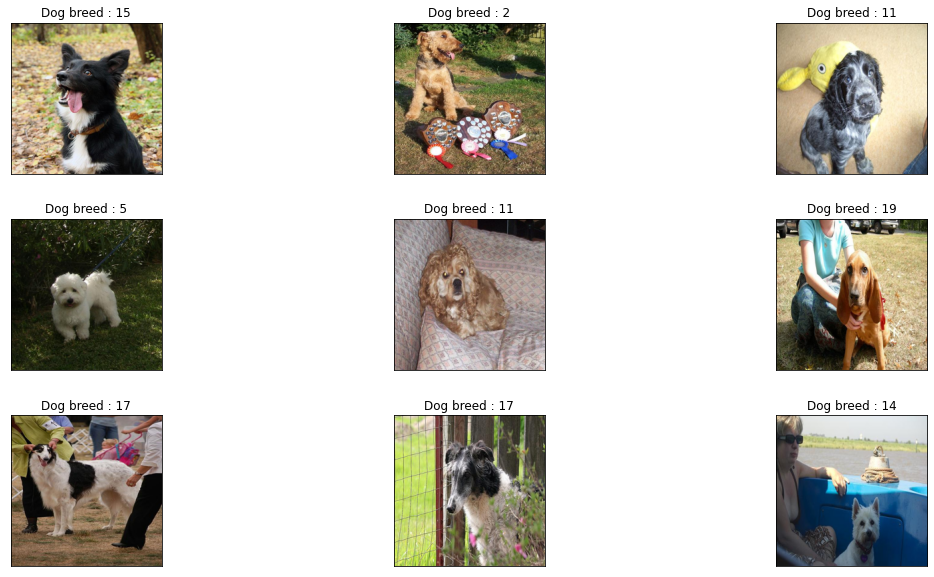

In [30]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [31]:
#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3375 3376 3377]

'n' values after shuffling =  [3135  144 1232 ... 1294  860 3174]


In [32]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3378, 227, 227, 3)


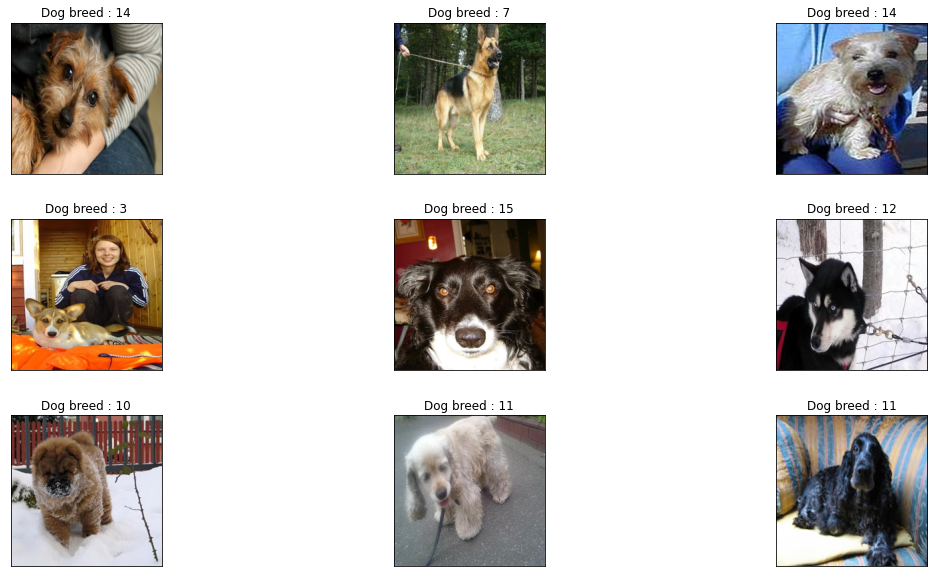

In [33]:
display_rand_images(images, labels)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2702, 227, 227, 3)
y_train shape =  (2702,)

x_test shape =  (676, 227, 227, 3)
y_test shape =  (676,)


In [35]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 384)        

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [38]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
2702/2702 [==============================] - 17s 6ms/step - loss: 3.3664 - accuracy: 0.1199
Epoch 2/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.9861 - accuracy: 0.1547
Epoch 3/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.9039 - accuracy: 0.1599
Epoch 4/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.7786 - accuracy: 0.1810
Epoch 5/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.6631 - accuracy: 0.2017
Epoch 6/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.5931 - accuracy: 0.2147
Epoch 7/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.5029 - accuracy: 0.2280
Epoch 8/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.4859 - accuracy: 0.2454
Epoch 9/100
2702/2702 [==============================] - 9s 3ms/step - loss: 2.4068 - accuracy: 0.2535
Epoch 10/100
2702/2702 [==============================] - 9s 3ms/step - 

In [39]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

676/676 [==============================] - 1s 2ms/step
4.4677670792009705 0.30177515745162964


In [40]:
pred = model.predict(x_test)

pred.shape

(676, 20)

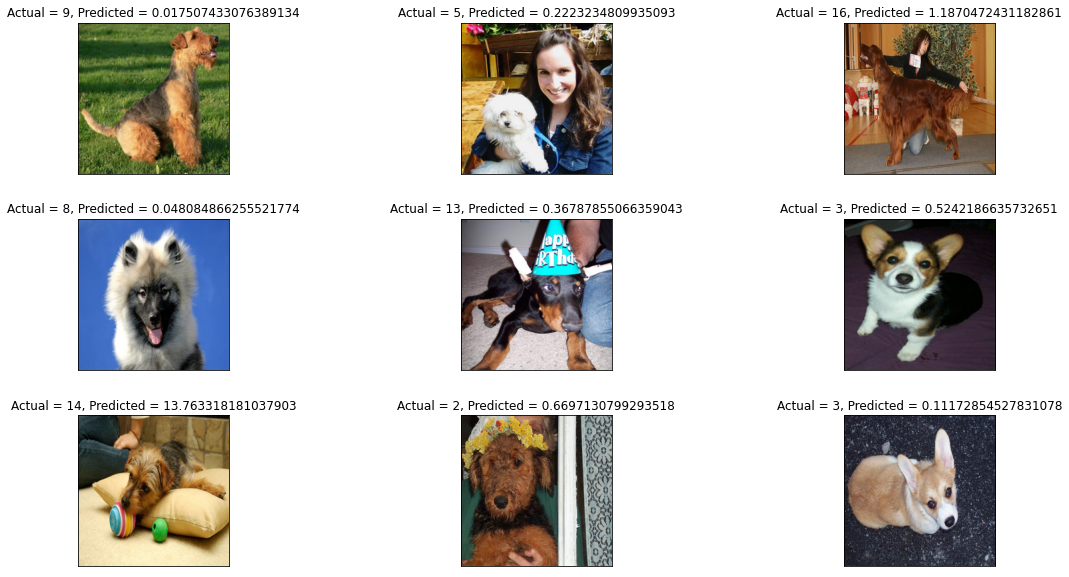

In [41]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()